In [1]:
from pathlib import Path
import pandas as pd
import trompy as tp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

%matplotlib inline

In [2]:
DATAFOLDER = Path("../data")
FIGSFOLDER = Path("../figures")

In [3]:
df = pd.read_csv(DATAFOLDER / 'fig_1_body_weight.csv')

In [4]:
# Melt the DataFrame to long format
df_long = df.melt(id_vars=['ID', 'sex', 'group'], 
                  value_vars=['week_0', 'week_1', 'week_2', 'week_3', 'week_4', 'week_5', 'week_6', 'week_7', 'week_8'],
                  var_name='week', 
                  value_name='body_weight')

# Convert 'week' to a numeric value for easier plotting
df_long['week'] = df_long['week'].str.extract('(\d+)').astype(int)

df_stats = df_long.groupby(['sex', 'group', 'week']).agg(
    mean_body_weight=('body_weight', 'mean'),
    sem_body_weight=('body_weight', lambda x: np.std(x, ddof=1) / np.sqrt(len(x)))
).reset_index()

#filter by sex
df_male_stats = df_stats[df_mean['sex'] == 'male']
df_female_stats = df_stats[df_mean['sex'] == 'female']

NameError: name 'df_mean' is not defined

NameError: name 'df_male_stats' is not defined

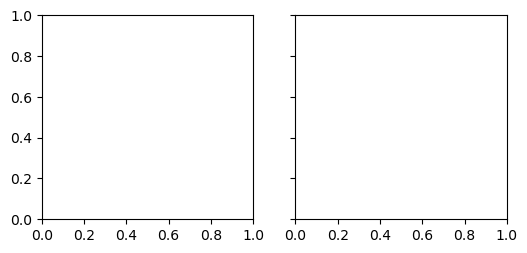

In [5]:
colors = {'NR': "#FF7F0E",
          'PR': "#9467BD",
          'IPR': "#17BECF"}

markers = {'NR': "o",
          'PR': "D",
          'IPR': "v"}


f,ax=plt.subplots(figsize=(6, 3),ncols=2, sharey=True, gridspec_kw={"bottom": 0.2})

for group in df_male_stats['group'].unique():
    subset = df_male_stats[df_male_stats['group'] == group]
    ax[0].errorbar(subset['week'], subset['mean_body_weight'], yerr=subset['sem_body_weight'],
                 label=group, color=colors[group], marker=markers[group])

for group in df_female_stats['group'].unique():
    subset = df_female_stats[df_female_stats['group'] == group]
    ax[1].errorbar(subset['week'], subset['mean_body_weight'], yerr=subset['sem_body_weight'],
                 label=group, color=colors[group], marker=markers[group])
    

#grey for weeks when IPR is on NR diet    
x_ranges = [(-0.5, 0.5), (1.5, 2.5), (3.5, 4.5), (5.5, 6.5), (7.5, 8.5)]

for subplot in ax:
    for start, end in x_ranges:
        subplot.axvspan(start, end, color='#ededed')

        
ax[0].set_ylim(19,36)

ax[0].set_ylabel("body weight (g)", fontsize = 12)

for ax in [ax[0],ax[1]]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel('time (weeks)', fontsize = 12)
    ax.set_xticks([0,1,2,3,4,5,6,7,8]) 

    
f.savefig(FIGSFOLDER / "BW_v02.pdf")    
